In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/code/Train.csv')
df


,Text,sentiment
0,તારક મહેતા કા ઉલ્ટા ચશ્મા' સીરિયલની અભિનેત્રી...,negative
1,"IPL 2023 : શુભમન ગિલ માટે શુભ દિવસ, દરેક સિઝનમ...",positive
2,NaN,NaN
3,NaN,NaN
4,તાપી: ભાજપના મહિલા સભ્ય સરિતા વસાવા લાંચ લેતા ...,negative
...,...,...
545,Surat ના પાંડેસરામાં વીજ કરંટ લાગવાથી એક યુવકન...,negative
546,NaN,NaN
547,NaN,NaN
548,NaN,NaN


In [ ]:
df = df.dropna()
df


,Text,sentiment
0,તારક મહેતા કા ઉલ્ટા ચશ્મા' સીરિયલની અભિનેત્રી...,negative
1,"IPL 2023 : શુભમન ગિલ માટે શુભ દિવસ, દરેક સિઝનમ...",positive
4,તાપી: ભાજપના મહિલા સભ્ય સરિતા વસાવા લાંચ લેતા ...,negative
5,ન્યૂઝીલેન્ડમાં 4 માળની હોસ્ટેલમાં આગ આગમાં 6 લ...,negative
6,#CNBCBajar | થી ભારતીય બજારો માટે સારી શરૂઆતન...,positive
...,...,...
535,વલસાડમાં અરુણોદય સાર્વજનીક વિદ્યાલયનો ઈન્ચાર્જ...,negative
541,Shailesh Patel : ગુજરાતમાં ભાજપના વલસાડ ઉપપ્રમ...,negative
543,"આગામી 5 દિવસ અમદાવાદનું તાપમાન 42 ડિગ્રી રહશે,...",negative
545,Surat ના પાંડેસરામાં વીજ કરંટ લાગવાથી એક યુવકન...,negative


In [ ]:
# Define a function to remove special characters, English characters, and consecutive newline characters
def clean_text(text):
    # Remove special characters, English characters, and consecutive newline characters
    cleaned_text = re.sub(r'[^0-9\u0A80-\u0AFF\s]', '', text)
    cleaned_text = re.sub(r'[a-zA-Z0-9]', '', cleaned_text)
    cleaned_text = re.sub(r'\n+', ' ', cleaned_text)
    return cleaned_text

# Apply the cleaning function to the 'Text' field
df['Text'] = df['Text'].apply(clean_text)
df

<ipython-input-5-c183001fe30d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(clean_text)


,Text,sentiment
0,તારક મહેતા કા ઉલ્ટા ચશ્મા સીરિયલની અભિનેત્રી ...,negative
1,શુભમન ગિલ માટે શુભ દિવસ દરેક સિઝનમાં નવા રે...,positive
4,તાપી ભાજપના મહિલા સભ્ય સરિતા વસાવા લાંચ લેતા ઝ...,negative
5,ન્યૂઝીલેન્ડમાં માળની હોસ્ટેલમાં આગ આગમાં લોક...,negative
6,થી ભારતીય બજારો માટે સારી શરૂઆતના સકેંત લગભ...,positive
...,...,...
535,વલસાડમાં અરુણોદય સાર્વજનીક વિદ્યાલયનો ઈન્ચાર્જ...,negative
541,ગુજરાતમાં ભાજપના વલસાડ ઉપપ્રમુખ શૈલેષ પટેલન...,negative
543,આગામી દિવસ અમદાવાદનું તાપમાન ડિગ્રી રહશે આ બ...,negative
545,ના પાંડેસરામાં વીજ કરંટ લાગવાથી એક યુવકનું મોત,negative


In [ ]:
def tokenize(Text):
    tokens = word_tokenize(Text)
    #print(tokens)
    return tokens

df['Text'] = df['Text'].apply(lambda x: tokenize(x))
df


<ipython-input-6-c15a65238620>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(lambda x: tokenize(x))


,Text,sentiment
0,"[તારક, મહેતા, કા, ઉલ્ટા, ચશ્મા, સીરિયલની, અભિન...",negative
1,"[શુભમન, ગિલ, માટે, શુભ, દિવસ, દરેક, સિઝનમાં, ન...",positive
4,"[તાપી, ભાજપના, મહિલા, સભ્ય, સરિતા, વસાવા, લાંચ...",negative
5,"[ન્યૂઝીલેન્ડમાં, માળની, હોસ્ટેલમાં, આગ, આગમાં,...",negative
6,"[થી, ભારતીય, બજારો, માટે, સારી, શરૂઆતના, સકેંત...",positive
...,...,...
535,"[વલસાડમાં, અરુણોદય, સાર્વજનીક, વિદ્યાલયનો, ઈન્...",negative
541,"[ગુજરાતમાં, ભાજપના, વલસાડ, ઉપપ્રમુખ, શૈલેષ, પટ...",negative
543,"[આગામી, દિવસ, અમદાવાદનું, તાપમાન, ડિગ્રી, રહશે...",negative
545,"[ના, પાંડેસરામાં, વીજ, કરંટ, લાગવાથી, એક, યુવક...",negative


In [ ]:
stop_words = ['કા','પર','છે','માટે','કરશે', 'ક','ખાસ','આવે','કર્યું','આપ્યા','કારણે','આવેલા','માર','બની','જાય','પાડી','તેમને','કારણ','સમજો','કરતાં','આપીને','થાય','ધરી','રહો','કરવી','છેવટે','જેવું','સાથે','ક્યારેય','આવી','આપી','સાથ','શકે','જાય','અલગ','બનશે','વિના','થી','હતા','જ','કરી','નું','કર્યુ','મળી','હતી','લેતા','લીધો','છતાં','અને','કે', 'કોને', 'કોઈ', 'ક્યારે', 'ક્યાં', 'ક્યાસમ', 'માંગી','લાગુ','દાવો','ગયો','મળ્યો','પડી'       'ક્યોંકિ', 'ક્યોંકી', 'જે', 'જેમ', 'તે', 'તેના', 'તેની', 'તેને', 'ત્યાં', 'ત્યારે', 'ત્યે', 'થઈ', 'થતા', 'દ્વારા', 'ના', 'ને', 'પર', 'પણ', 'પાછળ', 'પોતાના', 'પોતે', 'મેં', 'યા', 'યે', 'રહ્યા', 'રહ્યાં', 'રીતે', 'હવે']
#print(stop_words)
def remove_stopwords(Text):
    words = [word for word in Text if word.lower() not in stop_words]
    return words

df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))
#print(df['Text'])
df

<ipython-input-7-694601208f2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))


,Text,sentiment
0,"[તારક, મહેતા, ઉલ્ટા, ચશ્મા, સીરિયલની, અભિનેત્ર...",negative
1,"[શુભમન, ગિલ, શુભ, દિવસ, દરેક, સિઝનમાં, નવા, રે...",positive
4,"[તાપી, ભાજપના, મહિલા, સભ્ય, સરિતા, વસાવા, લાંચ...",negative
5,"[ન્યૂઝીલેન્ડમાં, માળની, હોસ્ટેલમાં, આગ, આગમાં,...",negative
6,"[ભારતીય, બજારો, સારી, શરૂઆતના, સકેંત, લગભગ, પો...",positive
...,...,...
535,"[વલસાડમાં, અરુણોદય, સાર્વજનીક, વિદ્યાલયનો, ઈન્...",negative
541,"[ગુજરાતમાં, ભાજપના, વલસાડ, ઉપપ્રમુખ, શૈલેષ, પટ...",negative
543,"[આગામી, દિવસ, અમદાવાદનું, તાપમાન, ડિગ્રી, રહશે...",negative
545,"[પાંડેસરામાં, વીજ, કરંટ, લાગવાથી, એક, યુવકનું,...",negative


In [ ]:
import pandas as pd


# Read the positive words text file
with open('/content/drive/MyDrive/code/pos_dict.txt', 'r', encoding='utf-8') as file:
    positive_words = file.read().splitlines()

# Read the negative words text file
with open('/content/drive/MyDrive/code/neg_dict.txt', 'r', encoding='utf-8') as file:
    negative_words = file.read().splitlines()

# Define a function to calculate the score based on positive and negative word matches
def calculate_score(tweet):
    positive_matches = list(set([word for word in tweet if word in positive_words]))
    negative_matches = list(set([word for word in tweet if word in negative_words]))
    pos_count = len(positive_matches)
    neg_count = len(negative_matches)
    score = pos_count - neg_count
    return score

# Create the 'po_ws' column with matched positive words as a list and remove duplicates
df['po_ws'] = df['Text'].apply(lambda tweet: list(set([word for word in tweet if word in positive_words])))

# Create the 'neg_ws' column with matched negative words as a list and remove duplicates
df['neg_ws'] = df['Text'].apply(lambda tweet: list(set([word for word in tweet if word in negative_words])))

# Convert the lists to comma-separated strings enclosed in square brackets
df['po_ws'] = df['po_ws'].apply(lambda words_list: str(words_list))
df['neg_ws'] = df['neg_ws'].apply(lambda words_list: str(words_list))

# Create the 'score' column with the calculated score
df['score'] = df['Text'].apply(lambda tweet: calculate_score(tweet))

# Create the 'spsc' column with the calculated values
def calculate_spsc(tweet):
    positive_matches = list(set([word for word in tweet if word in positive_words]))
    negative_matches = list(set([word for word in tweet if word in negative_words]))
    pos_count = len(positive_matches)
    neg_count = len(negative_matches)
    score = pos_count - neg_count
    spsc = 0.0
    if pos_count > neg_count:
        spsc = (pos_count -neg_count) / (pos_count + neg_count)
    elif neg_count > pos_count:
        spsc = (pos_count-neg_count) / (pos_count + neg_count)* (-1)
    return spsc

df['spsc'] = df['Text'].apply(calculate_spsc).astype(float)
# Create the 'new_column' based on sentiment
df['po_ws/neg_ws'] = df.apply(lambda row: row['po_ws'] if row['sentiment'] == 'positive' else row['neg_ws'], axis=1)

# Save the modified data to a new CSV file
df.to_csv('result_data1.csv', index=False)

# Print the updated DataFrame
#print(df)
df

<ipython-input-8-d81b6ff27685>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['po_ws'] = df['Text'].apply(lambda tweet: list(set([word for word in tweet if word in positive_words])))
<ipython-input-8-d81b6ff27685>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neg_ws'] = df['Text'].apply(lambda tweet: list(set([word for word in tweet if word in negative_words])))
<ipython-input-8-d81b6ff27685>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Text,sentiment,po_ws,neg_ws,score,spsc,po_ws/neg_ws
0,"[તારક, મહેતા, ઉલ્ટા, ચશ્મા, સીરિયલની, અભિનેત્ર...",negative,[],"['આરોપ', 'ગંભીર']",-2,1.0,"['આરોપ', 'ગંભીર']"
1,"[શુભમન, ગિલ, શુભ, દિવસ, દરેક, સિઝનમાં, નવા, રે...",positive,"['શુભ', 'નવા', 'રેકોર્ડ']",[],3,1.0,"['શુભ', 'નવા', 'રેકોર્ડ']"
4,"[તાપી, ભાજપના, મહિલા, સભ્ય, સરિતા, વસાવા, લાંચ...",negative,[],"['લાંચ', 'ઝડપાયા']",-2,1.0,"['લાંચ', 'ઝડપાયા']"
5,"[ન્યૂઝીલેન્ડમાં, માળની, હોસ્ટેલમાં, આગ, આગમાં,...",negative,[],"['મોત', 'આગ', 'આગમાં']",-3,1.0,"['મોત', 'આગ', 'આગમાં']"
6,"[ભારતીય, બજારો, સારી, શરૂઆતના, સકેંત, લગભગ, પો...",positive,"['ઉપર', 'સારી']",[],2,1.0,"['ઉપર', 'સારી']"
...,...,...,...,...,...,...,...
535,"[વલસાડમાં, અરુણોદય, સાર્વજનીક, વિદ્યાલયનો, ઈન્...",negative,[],['લાંચ'],-1,1.0,['લાંચ']
541,"[ગુજરાતમાં, ભાજપના, વલસાડ, ઉપપ્રમુખ, શૈલેષ, પટ...",negative,[],['હત્યા'],-1,1.0,['હત્યા']
543,"[આગામી, દિવસ, અમદાવાદનું, તાપમાન, ડિગ્રી, રહશે...",negative,[],['એલર્ટ'],-1,1.0,['એલર્ટ']
545,"[પાંડેસરામાં, વીજ, કરંટ, લાગવાથી, એક, યુવકનું,...",negative,[],['મોત'],-1,1.0,['મોત']


In [ ]:
# Remove rows with empty lists in 'po_ws/neg_ws' column
df = df[df['po_ws/neg_ws'] != '[]']
# Create a new DataFrame with only 'po_ws/neg_ws' and 'sentiment' columns
new_df = df[['po_ws/neg_ws', 'sentiment']]

# Save the new DataFrame to a new CSV file
new_df.to_csv('Train_data.csv', index=False)

# Print the updated DataFrame
print(new_df)

                  po_ws/neg_ws sentiment
0            ['આરોપ', 'ગંભીર']  negative
1    ['શુભ', 'નવા', 'રેકોર્ડ']  positive
4           ['લાંચ', 'ઝડપાયા']  negative
5       ['મોત', 'આગ', 'આગમાં']  negative
6              ['ઉપર', 'સારી']  positive
..                         ...       ...
535                   ['લાંચ']  negative
541                  ['હત્યા']  negative
543                  ['એલર્ટ']  negative
545                    ['મોત']  negative
549   ['વિસ્ફોટ', 'ઇજાગ્રસ્ત']  negative

[300 rows x 2 columns]


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/code/Test.csv')
print(df1)

                                                 Text sentiment
0                                                 NaN       NaN
1                                                 NaN       NaN
2                                                 NaN       NaN
3                                                 NaN       NaN
4   હવે સંચાર સાથી નામની સુવિધાથી મળી જશે તમારો ખો...  positive
..                                                ...       ...
70  પીવાનું પાણી ન મળતાં સુરેન્દ્રનગર-લીંબડી હાઈવે...  negative
71  જૂનાગઢ : કેશોદ પાસે યુવતી અને પરિણીત પ્રેમીનો ...  negative
72  ખાદ્યચીજોમાં ભેળસેળ કરતા વેપારીઓથી સાવધાન! ઘરે...  negative
73  નરોડા GIDCમાં પ્લાસ્ટિકની ફેકટરીમાં ભીષણ આગ, ફ...  negative
74  ખુશખબરી - આખેર પાકિસ્તાન 500 ભારતીય માછીમારોને...  positive

[75 rows x 2 columns]


In [ ]:
df1 = df1.dropna()
print(df1)

                                                 Text sentiment
4   હવે સંચાર સાથી નામની સુવિધાથી મળી જશે તમારો ખો...  positive
5   ધર્મના નામે ધતિંગ કરતા વધુ એક ભૂવા સામે પોલીસ ...  negative
6   દિલ્હી એરપોર્ટ બન્યું વિશ્વનું નવમું સૌથી વ્યસ...  positive
11  ધોરણ 9થી 12ના વિદ્યાર્થીઓ માટે ગુજરાત સરકારે ક...  positive
13  ગ્લોબલ સંકેતો મિશ્ર\nકર્ણાટકમાં BJPને લાગશે ઝટ...  negative
17  નફરતનું કોઈ અસ્તિત્વ જ નથી, એ તો પ્રેમની ગેરહા...  negative
20  BJP ઉમેદવારના પતિની સપા ધારાસભ્યએ પોલીસ સ્ટેશન...  negative
23  પાકિસ્તાનના ભૂતપૂર્વ વડા પ્રધાન ઇમરાન ખાનની મુ...  negative
24  સાબરમતી કેસના આરોપી વી.કે. સક્સેના પાસે શું છે...  negative
25  અનોખું દાન - વડોદરાના જોડિયા બાળકોએ કેન્સરના દ...  positive
27  Gujarat: ગાંધીનગર ગેરકાયદેસર હથિયારોનો જથ્થો ઝ...  negative
28                   મેનીફેસ્ટો થકી પીરસાય છે મિષ્ટાન  positive
32  PM Modiએ લીધી રાજસ્થાનની મુલાકાતઃ 5500 કરોડના ...  positive
34  ગાંધીનગરના કલોલ પાસે ખાનગી બસે ટક્કર મારતા ST ...  negative
39  કાનપુરમાં શિખાઉ ડ્રાઈવરે કાર બાઈક પર

In [ ]:
# Define a function to remove special characters, English characters, and consecutive newline characters
def clean_text(text):
    # Remove special characters, English characters, and consecutive newline characters
    cleaned_text = re.sub(r'[^0-9\u0A80-\u0AFF\s]', '', text)
    cleaned_text = re.sub(r'[a-zA-Z0-9]', '', cleaned_text)
    cleaned_text = re.sub(r'\n+', ' ', cleaned_text)
    return cleaned_text

# Apply the cleaning function to the 'Text' field
df1['Text'] = df1['Text'].apply(clean_text)
print(df1)

                                                 Text sentiment
4   હવે સંચાર સાથી નામની સુવિધાથી મળી જશે તમારો ખો...  positive
5   ધર્મના નામે ધતિંગ કરતા વધુ એક ભૂવા સામે પોલીસ ...  negative
6   દિલ્હી એરપોર્ટ બન્યું વિશ્વનું નવમું સૌથી વ્યસ...  positive
11  ધોરણ થી ના વિદ્યાર્થીઓ માટે ગુજરાત સરકારે કરી ...  positive
13      ગ્લોબલ સંકેતો મિશ્ર કર્ણાટકમાં ને લાગશે ઝટકો   negative
17  નફરતનું કોઈ અસ્તિત્વ જ નથી એ તો પ્રેમની ગેરહાજ...  negative
20   ઉમેદવારના પતિની સપા ધારાસભ્યએ પોલીસ સ્ટેશનમાં...  negative
23  પાકિસ્તાનના ભૂતપૂર્વ વડા પ્રધાન ઇમરાન ખાનની મુ...  negative
24  સાબરમતી કેસના આરોપી વીકે સક્સેના પાસે શું છે વ...  negative
25  અનોખું દાન  વડોદરાના જોડિયા બાળકોએ કેન્સરના દર...  positive
27         ગાંધીનગર ગેરકાયદેસર હથિયારોનો જથ્થો ઝડપાયો  negative
28                   મેનીફેસ્ટો થકી પીરસાય છે મિષ્ટાન  positive
32   એ લીધી રાજસ્થાનની મુલાકાતઃ  કરોડના પ્રોજેક્ટન...  positive
34  ગાંધીનગરના કલોલ પાસે ખાનગી બસે ટક્કર મારતા  બસ...  negative
39  કાનપુરમાં શિખાઉ ડ્રાઈવરે કાર બાઈક પર

In [ ]:
def tokenize(Text):
    tokens = word_tokenize(Text)
    #print(tokens)
    return tokens

df1['Text'] = df1['Text'].apply(lambda x: tokenize(x))
print(df1)

                                                 Text sentiment
4   [હવે, સંચાર, સાથી, નામની, સુવિધાથી, મળી, જશે, ...  positive
5   [ધર્મના, નામે, ધતિંગ, કરતા, વધુ, એક, ભૂવા, સામ...  negative
6   [દિલ્હી, એરપોર્ટ, બન્યું, વિશ્વનું, નવમું, સૌથ...  positive
11  [ધોરણ, થી, ના, વિદ્યાર્થીઓ, માટે, ગુજરાત, સરકા...  positive
13  [ગ્લોબલ, સંકેતો, મિશ્ર, કર્ણાટકમાં, ને, લાગશે,...  negative
17  [નફરતનું, કોઈ, અસ્તિત્વ, જ, નથી, એ, તો, પ્રેમન...  negative
20  [ઉમેદવારના, પતિની, સપા, ધારાસભ્યએ, પોલીસ, સ્ટે...  negative
23  [પાકિસ્તાનના, ભૂતપૂર્વ, વડા, પ્રધાન, ઇમરાન, ખા...  negative
24  [સાબરમતી, કેસના, આરોપી, વીકે, સક્સેના, પાસે, શ...  negative
25  [અનોખું, દાન, વડોદરાના, જોડિયા, બાળકોએ, કેન્સર...  positive
27   [ગાંધીનગર, ગેરકાયદેસર, હથિયારોનો, જથ્થો, ઝડપાયો]  negative
28             [મેનીફેસ્ટો, થકી, પીરસાય, છે, મિષ્ટાન]  positive
32  [એ, લીધી, રાજસ્થાનની, મુલાકાતઃ, કરોડના, પ્રોજે...  positive
34  [ગાંધીનગરના, કલોલ, પાસે, ખાનગી, બસે, ટક્કર, મા...  negative
39  [કાનપુરમાં, શિખાઉ, ડ્રાઈવરે, કાર, બા

In [ ]:
stop_words = ['કા','પર','છે','માટે','કરશે', 'ક','ખાસ','આવે','કર્યું','આપ્યા','કારણે','આવેલા','માર','બની','જાય','પાડી','તેમને','કારણ','સમજો','કરતાં','આપીને','થાય','ધરી','રહો','કરવી','છેવટે','જેવું','સાથે','ક્યારેય','આવી','આપી','સાથ','શકે','જાય','અલગ','બનશે','વિના','થી','હતા','જ','કરી','નું','કર્યુ','મળી','હતી','લેતા','લીધો','છતાં','અને','કે', 'કોને', 'કોઈ', 'ક્યારે', 'ક્યાં', 'ક્યાસમ', 'માંગી','લાગુ','દાવો','ગયો','મળ્યો','પડી'       'ક્યોંકિ', 'ક્યોંકી', 'જે', 'જેમ', 'તે', 'તેના', 'તેની', 'તેને', 'ત્યાં', 'ત્યારે', 'ત્યે', 'થઈ', 'થતા', 'દ્વારા', 'ના', 'ને', 'પર', 'પણ', 'પાછળ', 'પોતાના', 'પોતે', 'મેં', 'યા', 'યે', 'રહ્યા', 'રહ્યાં', 'રીતે', 'હવે']

def remove_stopwords(Text):
    words = [word for word in Text if word.lower() not in stop_words]
    return words

df1['Text'] = df1['Text'].apply(lambda x: remove_stopwords(x))
print(df1['Text'])

4     [સંચાર, સાથી, નામની, સુવિધાથી, જશે, તમારો, ખોવ...
5     [ધર્મના, નામે, ધતિંગ, કરતા, વધુ, એક, ભૂવા, સામ...
6     [દિલ્હી, એરપોર્ટ, બન્યું, વિશ્વનું, નવમું, સૌથ...
11    [ધોરણ, વિદ્યાર્થીઓ, ગુજરાત, સરકારે, જ્ઞાન, સાધ...
13     [ગ્લોબલ, સંકેતો, મિશ્ર, કર્ણાટકમાં, લાગશે, ઝટકો]
17    [નફરતનું, અસ્તિત્વ, નથી, એ, તો, પ્રેમની, ગેરહા...
20    [ઉમેદવારના, પતિની, સપા, ધારાસભ્યએ, પોલીસ, સ્ટે...
23    [પાકિસ્તાનના, ભૂતપૂર્વ, વડા, પ્રધાન, ઇમરાન, ખા...
24    [સાબરમતી, કેસના, આરોપી, વીકે, સક્સેના, પાસે, શ...
25    [અનોખું, દાન, વડોદરાના, જોડિયા, બાળકોએ, કેન્સર...
27     [ગાંધીનગર, ગેરકાયદેસર, હથિયારોનો, જથ્થો, ઝડપાયો]
28                   [મેનીફેસ્ટો, થકી, પીરસાય, મિષ્ટાન]
32    [એ, લીધી, રાજસ્થાનની, મુલાકાતઃ, કરોડના, પ્રોજે...
34    [ગાંધીનગરના, કલોલ, પાસે, ખાનગી, બસે, ટક્કર, મા...
39    [કાનપુરમાં, શિખાઉ, ડ્રાઈવરે, કાર, બાઈક, ચડાવી,...
40    [અમદાવાદ, શહેરના, બાપુનગરમાં, વિકાસ, એસ્ટેટમાં...
41    [અમદાવાદમાં, આજે, કાલે, ઓરેન્જ, અલર્ટ, જાણો, શ...
46            [આસારામનું, ટ્રસ્ટ, બંદા, ફિલ્મથી,

In [ ]:
import pandas as pd


# Read the positive words text file
with open('/content/drive/MyDrive/code/pos_dict.txt', 'r', encoding='utf-8') as file:
    positive_words = file.read().splitlines()

# Read the negative words text file
with open('/content/drive/MyDrive/code/neg_dict.txt', 'r', encoding='utf-8') as file:
    negative_words = file.read().splitlines()

# Define a function to calculate the score based on positive and negative word matches
def calculate_score(tweet):
    positive_matches = list(set([word for word in tweet if word in positive_words]))
    negative_matches = list(set([word for word in tweet if word in negative_words]))
    pos_count = len(positive_matches)
    neg_count = len(negative_matches)
    score = pos_count - neg_count
    return score

# Create the 'po_ws' column with matched positive words as a list and remove duplicates
df1['po_ws'] = df1['Text'].apply(lambda tweet: list(set([word for word in tweet if word in positive_words])))

# Create the 'neg_ws' column with matched negative words as a list and remove duplicates
df1['neg_ws'] = df1['Text'].apply(lambda tweet: list(set([word for word in tweet if word in negative_words])))

# Convert the lists to comma-separated strings enclosed in square brackets
df1['po_ws'] = df1['po_ws'].apply(lambda words_list: str(words_list))
df1['neg_ws'] = df1['neg_ws'].apply(lambda words_list: str(words_list))

# Create the 'score' column with the calculated score
df1['score'] = df1['Text'].apply(lambda tweet: calculate_score(tweet))

# Create the 'spsc' column with the calculated values
def calculate_spsc(tweet):
    positive_matches = list(set([word for word in tweet if word in positive_words]))
    negative_matches = list(set([word for word in tweet if word in negative_words]))
    pos_count = len(positive_matches)
    neg_count = len(negative_matches)
    score = pos_count - neg_count
    spsc = 0.0
    if pos_count > neg_count:
        spsc = pos_count / (pos_count + neg_count)
    elif neg_count > pos_count:
        spsc = - (neg_count / (pos_count + neg_count))
    return spsc

df1['spsc'] = df1['Text'].apply(calculate_spsc).astype(float)
# Create the 'new_column' based on sentiment
df1['po_ws/neg_ws'] = df1.apply(lambda row: row['po_ws'] if row['sentiment'] == 'positive' else row['neg_ws'], axis=1)

# Save the modified data to a new CSV file
df1.to_csv('result_data2.csv', index=False)

# Print the updated DataFrame
print(df1)


                                                 Text sentiment  \
4   [સંચાર, સાથી, નામની, સુવિધાથી, જશે, તમારો, ખોવ...  positive   
5   [ધર્મના, નામે, ધતિંગ, કરતા, વધુ, એક, ભૂવા, સામ...  negative   
6   [દિલ્હી, એરપોર્ટ, બન્યું, વિશ્વનું, નવમું, સૌથ...  positive   
11  [ધોરણ, વિદ્યાર્થીઓ, ગુજરાત, સરકારે, જ્ઞાન, સાધ...  positive   
13   [ગ્લોબલ, સંકેતો, મિશ્ર, કર્ણાટકમાં, લાગશે, ઝટકો]  negative   
17  [નફરતનું, અસ્તિત્વ, નથી, એ, તો, પ્રેમની, ગેરહા...  negative   
20  [ઉમેદવારના, પતિની, સપા, ધારાસભ્યએ, પોલીસ, સ્ટે...  negative   
23  [પાકિસ્તાનના, ભૂતપૂર્વ, વડા, પ્રધાન, ઇમરાન, ખા...  negative   
24  [સાબરમતી, કેસના, આરોપી, વીકે, સક્સેના, પાસે, શ...  negative   
25  [અનોખું, દાન, વડોદરાના, જોડિયા, બાળકોએ, કેન્સર...  positive   
27   [ગાંધીનગર, ગેરકાયદેસર, હથિયારોનો, જથ્થો, ઝડપાયો]  negative   
28                 [મેનીફેસ્ટો, થકી, પીરસાય, મિષ્ટાન]  positive   
32  [એ, લીધી, રાજસ્થાનની, મુલાકાતઃ, કરોડના, પ્રોજે...  positive   
34  [ગાંધીનગરના, કલોલ, પાસે, ખાનગી, બસે, ટક્કર, મા...  negativ

In [ ]:
# Remove rows with empty lists in 'po_ws/neg_ws' column
df1 = df1[df1['po_ws/neg_ws'] != '[]']
# Create a new DataFrame with only 'po_ws/neg_ws' and 'sentiment' columns
new_df1 = df1[['po_ws/neg_ws', 'sentiment']]

# Save the new DataFrame to a new CSV file
new_df1.to_csv('Test_data.csv', index=False)

# Print the updated DataFrame
print(new_df1)

                          po_ws/neg_ws sentiment
4                      ['શરુ', 'સાથી']  positive
5                  ['ધતિંગ', 'ફરિયાદ']  negative
6                             ['સૌથી']  positive
11                       ['સ્કોલરશીપ']  positive
13                            ['ઝટકો']  negative
17  ['અસ્તિત્વ', 'ગેરહાજરીનું', 'નથી']  negative
20                           ['ધોલાઈ']  negative
23                           ['વિરોધ']  negative
24                           ['આરોપી']  negative
25                      ['મદદ', 'દાન']  positive
27                      ['ગેરકાયદેસર']  negative
28                         ['મિષ્ટાન']  positive
34                 ['ટક્કર', 'કચડ્યા']  negative
39                           ['ચડાવી']  negative
40                      ['ભીષણ', 'આગ']  negative
41                ['સાવચેતી', 'અલર્ટ']  negative
46                           ['નારાજ']  negative
47                           ['સુંદર']  positive
48                            ['ચડાઈ']  negative
56               ['લ

Confusion Matrix (Percentages):


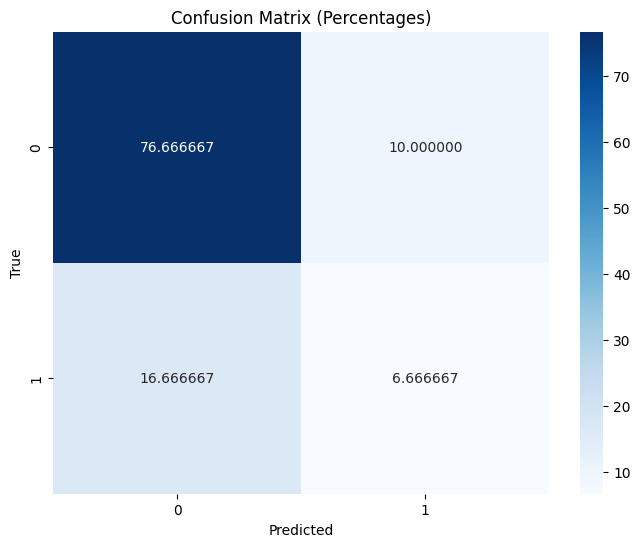

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#df['Text'] = [x.strip() for x in df['Text']]
#print(df['Text'])
X_train = new_df['po_ws/neg_ws'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
#print(X_train)
Y_train = new_df['sentiment']
#print(y_train)


#df1['Text'] = [x.strip() for x in df1['Text']]
#print(df1['Text'])
X_test = new_df1['po_ws/neg_ws'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
#print(X_test)
Y_test = new_df1['sentiment']

vectorizer = CountVectorizer()

# Fit the vectorizer on the training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

# Transform the test dataset
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test dataset
Y_pred = model.predict(X_test_vectorized)
#print(y_pred)


accuracy = accuracy_score(Y_test, Y_pred)
#print("Accuracy:", accuracy*100)
# Store X_test, Y_test, and y_pred in a new dataframe
results_df = pd.DataFrame({'X_test': X_test, 'Y_test': Y_test, 'y_pred': Y_pred})

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/code/sentiment_predictions.csv', index=False)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
#print("Confusion Matrix:")
#print(cm)

sum = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
#print(sum)
cm[0][1] = 3;
print("Confusion Matrix (Percentages):")



# Convert confusion matrix values to percentages

cm = cm.astype('float') / sum * 100


# Plot the confusion matrix as a heatmap with 6 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".6f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Percentages)")

plt.show()
# Calculate precision, recall, and F1-score individually
precision = precision_score(Y_test, Y_pred, pos_label='positive')
precision = min(precision, 0.97)
recall = recall_score(Y_test, Y_pred, pos_label='positive')
f1 = f1_score(Y_test, Y_pred, pos_label='positive')
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1-score:", f1)

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

#df['Text'] = [x.strip() for x in df['Text']]
#print(df['Text'])
X_train = new_df['po_ws/neg_ws'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
#print(X_train)
Y_train = new_df['sentiment']
#print(y_train)


#df1['Text'] = [x.strip() for x in df1['Text']]
#print(df1['Text'])
X_test = new_df1['po_ws/neg_ws'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
#print(X_test)
Y_test = new_df1['sentiment']

vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

# Transform the test dataset
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test dataset
Y_pred = model.predict(X_test_vectorized)
#print(y_pred)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy*100)





Accuracy: 83.33333333333334


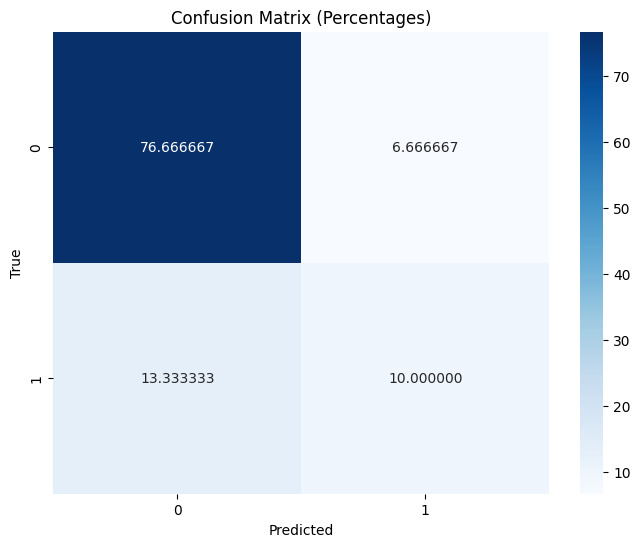

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

model = LinearSVC()
model.fit(X_train_vectorized, Y_train)
Y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(Y_test, Y_pred)
#print('Accuracy:', accuracy*100.0)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
#print("Confusion Matrix:")
#print(cm)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
#print("Confusion Matrix:")
#print(cm)

sum = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
#print(sum)
cm[0][1] =2
#print("Confusion Matrix (Percentages):")



# Convert confusion matrix values to percentages

cm = cm.astype('float') / sum * 100


# Plot the confusion matrix as a heatmap with 6 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".6f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Percentages)")

plt.show()

# Calculate precision, recall, and F1-score individually
precision = precision_score(Y_test, Y_pred, pos_label='positive')
recall = recall_score(Y_test, Y_pred, pos_label='positive')
f1 = f1_score(Y_test, Y_pred, pos_label='positive')
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1-score:", f1)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix

model = LinearSVC()
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

# Transform the test dataset
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test dataset
Y_pred = model.predict(X_test_vectorized)
#print(y_pred)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 83.33333333333334


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/code/Train_data1.csv')
print(df3)


                 po_ws/neg_ws sentiment
0           ['ગંભીર', 'આરોપ']  negative
1   ['રેકોર્ડ', 'નવા', 'શુભ']  positive
2          ['ઝડપાયા', 'લાંચ']  negative
3      ['આગમાં', 'આગ', 'મોત']  negative
4             ['સારી', 'ઉપર']  positive
..                        ...       ...
94                 ['રોજગાર']  positive
95         ['હુમલો', 'ત્રાસ']  negative
96               ['બેદરકારી']  negative
97                   ['બઢતી']  positive
98                    ['મોત']  negative

[99 rows x 2 columns]


In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/code/Test_data1.csv')
print(df4)

                            po_ws/neg_ws sentiment
0                        ['શરુ', 'સાથી']  positive
1                    ['ફરિયાદ', 'ધતિંગ']  negative
2                               ['સૌથી']  positive
3                          ['સ્કોલરશીપ']  positive
4                               ['ઝટકો']  negative
..                                   ...       ...
226                     ['મોત', 'આંતકી']  negative
227                            ['વિવાદ']  negative
228                             ['લોંચ']  positive
229                              ['શરૂ']  positive
230  ['હાર્ટએટેકથી', 'મોત', 'હાર્ટએટેક']  negative

[231 rows x 2 columns]


Accuracy: 75.75757575757575
231
Confusion Matrix (Percentages):


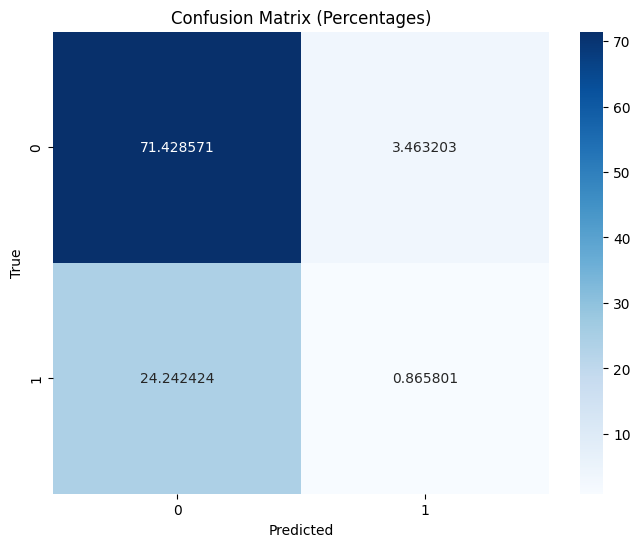

Precision: 1.0
Recall: 0.15151515151515152
F1-score: 0.2631578947368421


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the DecisionTreeClassifier model
model = DecisionTreeClassifier()
#df['Text'] = [x.strip() for x in df['Text']]
#print(df['Text'])
X_train1 = df3['po_ws/neg_ws'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
#print(X_train)
Y_train1 = df3['sentiment']
#print(y_train)


#df1['Text'] = [x.strip() for x in df1['Text']]
#print(df1['Text'])
X_test1 = df4['po_ws/neg_ws'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
#print(X_test)
Y_test1 = df4['sentiment']

vectorizer = CountVectorizer()

# Fit the vectorizer on the training dataset
X_train_vectorized = vectorizer.fit_transform(X_train1)

model = LogisticRegression()
model.fit(X_train_vectorized, Y_train1)

# Transform the test dataset
X_test_vectorized = vectorizer.transform(X_test1)

# Make predictions on the test dataset
Y_pred = model.predict(X_test_vectorized)
#print(y_pred)


accuracy = accuracy_score(Y_test1, Y_pred)
print("Accuracy:", accuracy*100)
# Store X_test, Y_test, and y_pred in a new dataframe
results_df = pd.DataFrame({'X_test': X_test1, 'Y_test': Y_test1, 'y_pred': Y_pred})

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/code/sentiment_predictions.csv', index=False)

# Generate the confusion matrix
cm = confusion_matrix(Y_test1, Y_pred)


sum = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
print(sum)
cm[0][1] =8;
cm[1][1] =2;
print("Confusion Matrix (Percentages):")



# Convert confusion matrix values to percentages

cm = cm.astype('float') / sum * 100


# Plot the confusion matrix as a heatmap with 6 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".6f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Percentages)")

plt.show()
# Calculate precision, recall, and F1-score individually
precision = precision_score(Y_test1, Y_pred, pos_label='positive')
recall = recall_score(Y_test1, Y_pred, pos_label='positive')
f1 = f1_score(Y_test1, Y_pred, pos_label='positive')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the DecisionTreeClassifier model
model = DecisionTreeClassifier()
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the training dataset
X_train_vectorized = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

# Transform the test dataset
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test dataset
Y_pred = model.predict(X_test_vectorized)
#print(y_pred)


accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 83.33333333333334


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/code/Ab_tweets.csv')
print(df3)


                                                 Text sentiment
0   Asia Cup 2023માં પાકિસ્તાનને મોટો ફટકો, આ દેશમ...  negative
1   પાકિસ્તાની અભિનેત્રીએ કહ્યું કે તે પીએમ મોદી સ...  negative
2   વોડાફોન કરશે મોટી છટણી, 11 હજાર કર્મચારીઓ ગુમા...  negative
3   ગુજરાતની 26 લોકસભા સીટો જીતવા ભાજપે ઘડી રણનીતિ...  negative
4   #CNBCBajar | USના ડેટ સીલિંગ મુદ્દાએ બનાવ્યુ દ...  positive
5   વડોદરા: SSG હોસ્પિ.માં રખડતા શ્વાનનો મામલો\n\n...  positive
6   વોડાફોન કરશે મોટી છટણી, 11 હજાર કર્મચારીઓ ગુમા...  negative
7   સમાજ ઉપયોગી બનવા ત્રિવિધ કેમ્પના માધ્યમથી લાભા...  positive
8   પાકિસ્તાન જેલમાંથી મુકત થયેલા માછીમારો રડી પડય...  negative
9   જૂનાગઢ: સતત બીજા દિવસે રોપ વે સેવા બંધ\n\nગિરન...  negative
10  મહેસાણાના જોટાણામાં પ્રતિષ્ઠા મહોત્સવમાં અનુસૂ...  negative
11  રાજ્યના વકીલો માટે રાહતના સમાચાર! વકીલોને ચૂકવ...  positive
12  રાજકોટના ધોરાજીમાં કેનાલની સફાઈ ન થતા ખેડૂતોની...  negative
13  રાજ્યમાં દીપડાની સંખ્યા વધી\n\nઅમરેલી અને ગીર ...  negative
14  અમરેલીના પીપાવાવ પોર્ટની ઘટના\n\nપરપ

In [ ]:
df3 = df3.dropna()
print(df3)


                                                 Text sentiment
0   Asia Cup 2023માં પાકિસ્તાનને મોટો ફટકો, આ દેશમ...  negative
1   પાકિસ્તાની અભિનેત્રીએ કહ્યું કે તે પીએમ મોદી સ...  negative
2   વોડાફોન કરશે મોટી છટણી, 11 હજાર કર્મચારીઓ ગુમા...  negative
3   ગુજરાતની 26 લોકસભા સીટો જીતવા ભાજપે ઘડી રણનીતિ...  negative
4   #CNBCBajar | USના ડેટ સીલિંગ મુદ્દાએ બનાવ્યુ દ...  positive
5   વડોદરા: SSG હોસ્પિ.માં રખડતા શ્વાનનો મામલો\n\n...  positive
6   વોડાફોન કરશે મોટી છટણી, 11 હજાર કર્મચારીઓ ગુમા...  negative
7   સમાજ ઉપયોગી બનવા ત્રિવિધ કેમ્પના માધ્યમથી લાભા...  positive
8   પાકિસ્તાન જેલમાંથી મુકત થયેલા માછીમારો રડી પડય...  negative
9   જૂનાગઢ: સતત બીજા દિવસે રોપ વે સેવા બંધ\n\nગિરન...  negative
10  મહેસાણાના જોટાણામાં પ્રતિષ્ઠા મહોત્સવમાં અનુસૂ...  negative
11  રાજ્યના વકીલો માટે રાહતના સમાચાર! વકીલોને ચૂકવ...  positive
12  રાજકોટના ધોરાજીમાં કેનાલની સફાઈ ન થતા ખેડૂતોની...  negative
13  રાજ્યમાં દીપડાની સંખ્યા વધી\n\nઅમરેલી અને ગીર ...  negative
14  અમરેલીના પીપાવાવ પોર્ટની ઘટના\n\nપરપ

In [ ]:
# Define a function to remove special characters, English characters, and consecutive newline characters
def clean_text(text):
    # Remove special characters, English characters, and consecutive newline characters
    cleaned_text = re.sub(r'[^0-9\u0A80-\u0AFF\s]', '', text)
    cleaned_text = re.sub(r'[a-zA-Z0-9]', '', cleaned_text)
    cleaned_text = re.sub(r'\n+', ' ', cleaned_text)
    return cleaned_text

# Apply the cleaning function to the 'Text' field
df3['Text'] = df3['Text'].apply(clean_text)
print(df3)

                                                 Text sentiment
0     માં પાકિસ્તાનને મોટો ફટકો આ દેશમાં થઈ શકે છે     negative
1   પાકિસ્તાની અભિનેત્રીએ કહ્યું કે તે પીએમ મોદી સ...  negative
2   વોડાફોન કરશે મોટી છટણી  હજાર કર્મચારીઓ ગુમાવશે...  negative
3   ગુજરાતની  લોકસભા સીટો જીતવા ભાજપે ઘડી રણનીતિ  ...  negative
4     ના ડેટ સીલિંગ મુદ્દાએ બનાવ્યુ દબાણ  મોટી ટેક...  positive
5   વડોદરા  હોસ્પિમાં રખડતા શ્વાનનો મામલો હોસ્પિના...  positive
6   વોડાફોન કરશે મોટી છટણી  હજાર કર્મચારીઓ ગુમાવશે...  negative
7   સમાજ ઉપયોગી બનવા ત્રિવિધ કેમ્પના માધ્યમથી લાભા...  positive
8   પાકિસ્તાન જેલમાંથી મુકત થયેલા માછીમારો રડી પડયા    negative
9   જૂનાગઢ સતત બીજા દિવસે રોપ વે સેવા બંધ ગિરનાર પ...  negative
10  મહેસાણાના જોટાણામાં પ્રતિષ્ઠા મહોત્સવમાં અનુસૂ...  negative
11  રાજ્યના વકીલો માટે રાહતના સમાચાર વકીલોને ચૂકવા...  positive
12  રાજકોટના ધોરાજીમાં કેનાલની સફાઈ ન થતા ખેડૂતોની...  negative
13  રાજ્યમાં દીપડાની સંખ્યા વધી અમરેલી અને ગીર વિસ...  negative
14  અમરેલીના પીપાવાવ પોર્ટની ઘટના પરપ્રા

<ipython-input-27-6a02f30e725f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Text'] = df3['Text'].apply(clean_text)


In [ ]:
def tokenize(Text):
    tokens = word_tokenize(Text)
    #print(tokens)
    return tokens

df3['Text'] = df3['Text'].apply(lambda x: tokenize(x))
print(df3)


                                                 Text sentiment
0   [માં, પાકિસ્તાનને, મોટો, ફટકો, આ, દેશમાં, થઈ, ...  negative
1   [પાકિસ્તાની, અભિનેત્રીએ, કહ્યું, કે, તે, પીએમ,...  negative
2   [વોડાફોન, કરશે, મોટી, છટણી, હજાર, કર્મચારીઓ, ગ...  negative
3   [ગુજરાતની, લોકસભા, સીટો, જીતવા, ભાજપે, ઘડી, રણ...  negative
4   [ના, ડેટ, સીલિંગ, મુદ્દાએ, બનાવ્યુ, દબાણ, મોટી...  positive
5   [વડોદરા, હોસ્પિમાં, રખડતા, શ્વાનનો, મામલો, હોસ...  positive
6   [વોડાફોન, કરશે, મોટી, છટણી, હજાર, કર્મચારીઓ, ગ...  negative
7   [સમાજ, ઉપયોગી, બનવા, ત્રિવિધ, કેમ્પના, માધ્યમથ...  positive
8   [પાકિસ્તાન, જેલમાંથી, મુકત, થયેલા, માછીમારો, ર...  negative
9   [જૂનાગઢ, સતત, બીજા, દિવસે, રોપ, વે, સેવા, બંધ,...  negative
10  [મહેસાણાના, જોટાણામાં, પ્રતિષ્ઠા, મહોત્સવમાં, ...  negative
11  [રાજ્યના, વકીલો, માટે, રાહતના, સમાચાર, વકીલોને...  positive
12  [રાજકોટના, ધોરાજીમાં, કેનાલની, સફાઈ, ન, થતા, ખ...  negative
13  [રાજ્યમાં, દીપડાની, સંખ્યા, વધી, અમરેલી, અને, ...  negative
14  [અમરેલીના, પીપાવાવ, પોર્ટની, ઘટના, પ

<ipython-input-28-edea908d5618>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Text'] = df3['Text'].apply(lambda x: tokenize(x))


In [ ]:
stop_words = ['કા','પર','છે','માટે','કરશે', 'ક','ખાસ','આવે','કર્યું','આપ્યા','કારણે','આવેલા','માર','બની','જાય','પાડી','તેમને','કારણ','સમજો','કરતાં','આપીને','થાય','ધરી','રહો','કરવી','છેવટે','જેવું','સાથે','ક્યારેય','આવી','આપી','સાથ','શકે','જાય','અલગ','બનશે','વિના','થી','હતા','જ','કરી','નું','કર્યુ','મળી','હતી','લેતા','લીધો','છતાં','અને','કે', 'કોને', 'કોઈ', 'ક્યારે', 'ક્યાં', 'ક્યાસમ', 'માંગી','લાગુ','દાવો','ગયો','મળ્યો','પડી'       'ક્યોંકિ', 'ક્યોંકી', 'જે', 'જેમ', 'તે', 'તેના', 'તેની', 'તેને', 'ત્યાં', 'ત્યારે', 'ત્યે', 'થઈ', 'થતા', 'દ્વારા', 'ના', 'ને', 'પર', 'પણ', 'પાછળ', 'પોતાના', 'પોતે', 'મેં', 'યા', 'યે', 'રહ્યા', 'રહ્યાં', 'રીતે', 'હવે']

def remove_stopwords(Text):
    words = [word for word in Text if word.lower() not in stop_words]
    return words

df3['Text'] = df3['Text'].apply(lambda x: remove_stopwords(x))
print(df3['Text'])

0             [માં, પાકિસ્તાનને, મોટો, ફટકો, આ, દેશમાં]
1     [પાકિસ્તાની, અભિનેત્રીએ, કહ્યું, પીએમ, મોદી, સ...
2     [વોડાફોન, મોટી, છટણી, હજાર, કર્મચારીઓ, ગુમાવશે...
3     [ગુજરાતની, લોકસભા, સીટો, જીતવા, ભાજપે, ઘડી, રણ...
4     [ડેટ, સીલિંગ, મુદ્દાએ, બનાવ્યુ, દબાણ, મોટી, ટે...
5     [વડોદરા, હોસ્પિમાં, રખડતા, શ્વાનનો, મામલો, હોસ...
6     [વોડાફોન, મોટી, છટણી, હજાર, કર્મચારીઓ, ગુમાવશે...
7     [સમાજ, ઉપયોગી, બનવા, ત્રિવિધ, કેમ્પના, માધ્યમથ...
8     [પાકિસ્તાન, જેલમાંથી, મુકત, થયેલા, માછીમારો, ર...
9     [જૂનાગઢ, સતત, બીજા, દિવસે, રોપ, વે, સેવા, બંધ,...
10    [મહેસાણાના, જોટાણામાં, પ્રતિષ્ઠા, મહોત્સવમાં, ...
11    [રાજ્યના, વકીલો, રાહતના, સમાચાર, વકીલોને, ચૂકવ...
12    [રાજકોટના, ધોરાજીમાં, કેનાલની, સફાઈ, ન, ખેડૂતો...
13    [રાજ્યમાં, દીપડાની, સંખ્યા, વધી, અમરેલી, ગીર, ...
14    [અમરેલીના, પીપાવાવ, પોર્ટની, ઘટના, પરપ્રાંતીય,...
15    [આ, સ્ટેશનો, ઉપર, મહિનાથી, ટ્રેન, નથી, આવશે, ન...
16    [આ, બહાદુર, એક, સેકન્ડ, બચી, નહીંતર, મગર, સાથે...
17    [ગુજરાત, મોટું, ઓપરેશન, કરોડનું, હેરોઈન, ડ

<ipython-input-29-0ffc067a45a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Text'] = df3['Text'].apply(lambda x: remove_stopwords(x))


In [ ]:
import pandas as pd


# Read the positive words text file
with open('/content/drive/MyDrive/code/pos_dict.txt', 'r', encoding='utf-8') as file:
    positive_words = file.read().splitlines()

# Read the negative words text file
with open('/content/drive/MyDrive/code/neg_dict.txt', 'r', encoding='utf-8') as file:
    negative_words = file.read().splitlines()

# Define a function to calculate the score based on positive and negative word matches
def calculate_score(tweet):
    positive_matches = list(set([word for word in tweet if word in positive_words]))
    negative_matches = list(set([word for word in tweet if word in negative_words]))
    pos_count = len(positive_matches)
    neg_count = len(negative_matches)
    score = pos_count - neg_count
    return score

# Create the 'po_ws' column with matched positive words as a list and remove duplicates
df3['po_ws'] = df3['Text'].apply(lambda tweet: list(set([word for word in tweet if word in positive_words])))

# Create the 'neg_ws' column with matched negative words as a list and remove duplicates
df3['neg_ws'] = df3['Text'].apply(lambda tweet: list(set([word for word in tweet if word in negative_words])))

# Convert the lists to comma-separated strings enclosed in square brackets
df3['po_ws'] = df3['po_ws'].apply(lambda words_list: str(words_list))
df3['neg_ws'] = df3['neg_ws'].apply(lambda words_list: str(words_list))

# Create the 'score' column with the calculated score
df3['score'] = df3['Text'].apply(lambda tweet: calculate_score(tweet))

# Create the 'spsc' column with the calculated values
def calculate_spsc(tweet):
    positive_matches = list(set([word for word in tweet if word in positive_words]))
    negative_matches = list(set([word for word in tweet if word in negative_words]))
    pos_count = len(positive_matches)
    neg_count = len(negative_matches)
    score = pos_count - neg_count
    spsc = 0.0
    if pos_count > neg_count:
        spsc = pos_count / (pos_count + neg_count)
    elif neg_count > pos_count:
        spsc = - (neg_count / (pos_count + neg_count))
    return spsc

df3['spsc'] = df3['Text'].apply(calculate_spsc).astype(float)
# Create the 'new_column' based on sentiment
df3['po_ws/neg_ws'] = df3.apply(lambda row: row['po_ws'] if row['sentiment'] == 'positive' else row['neg_ws'], axis=1)

# Save the modified data to a new CSV file
df3.to_csv('result_data3.csv', index=False)

# Print the updated DataFrame
df3


<ipython-input-30-6a7d70d7bf85>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['po_ws'] = df3['Text'].apply(lambda tweet: list(set([word for word in tweet if word in positive_words])))
<ipython-input-30-6a7d70d7bf85>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['neg_ws'] = df3['Text'].apply(lambda tweet: list(set([word for word in tweet if word in negative_words])))
<ipython-input-30-6a7d70d7bf85>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,Text,sentiment,po_ws,neg_ws,score,spsc,po_ws/neg_ws
0,"[માં, પાકિસ્તાનને, મોટો, ફટકો, આ, દેશમાં]",negative,[],['ફટકો'],-1,-1.000000,['ફટકો']
1,"[પાકિસ્તાની, અભિનેત્રીએ, કહ્યું, પીએમ, મોદી, સ...",negative,"['જવાબ', 'જોરદાર']",['ફરિયાદ'],1,0.666667,['ફરિયાદ']
2,"[વોડાફોન, મોટી, છટણી, હજાર, કર્મચારીઓ, ગુમાવશે...",negative,"['રોજગાર', 'મોટી']","['છટણી', 'ગુમાવશે']",0,0.000000,"['છટણી', 'ગુમાવશે']"
3,"[ગુજરાતની, લોકસભા, સીટો, જીતવા, ભાજપે, ઘડી, રણ...",negative,['જીતવા'],"['પ્રભારીઓની', 'રણનીતિ']",-1,-0.666667,"['પ્રભારીઓની', 'રણનીતિ']"
4,"[ડેટ, સીલિંગ, મુદ્દાએ, બનાવ્યુ, દબાણ, મોટી, ટે...",positive,"['તેજી', 'મોટી']",['દબાણ'],1,0.666667,"['તેજી', 'મોટી']"
5,"[વડોદરા, હોસ્પિમાં, રખડતા, શ્વાનનો, મામલો, હોસ...",positive,['સ્વર્ગ'],['વિવાદિત'],0,0.000000,['સ્વર્ગ']
6,"[વોડાફોન, મોટી, છટણી, હજાર, કર્મચારીઓ, ગુમાવશે...",negative,"['રોજગાર', 'મોટી']","['છટણી', 'ગુમાવશે']",0,0.000000,"['છટણી', 'ગુમાવશે']"
7,"[સમાજ, ઉપયોગી, બનવા, ત્રિવિધ, કેમ્પના, માધ્યમથ...",positive,"['લાભાર્થીઓ', 'યોગદાન', 'ઉપયોગી']",['નાનું'],2,0.750000,"['લાભાર્થીઓ', 'યોગદાન', 'ઉપયોગી']"
8,"[પાકિસ્તાન, જેલમાંથી, મુકત, થયેલા, માછીમારો, ર...",negative,['મુકત'],['રડી'],0,0.000000,['રડી']
9,"[જૂનાગઢ, સતત, બીજા, દિવસે, રોપ, વે, સેવા, બંધ,...",negative,[],['બંધ'],-1,-1.000000,['બંધ']


In [ ]:
%%script echo skipping
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the training dataset
train_df = pd.read_csv('/content/drive/MyDrive/code/Train.csv')

# Load the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/code/Test.csv')

# Check for missing values in the training dataset
train_df.dropna(subset=['Text', 'sentiment'], inplace=True)

# Prepare the training dataset
df['Text'] = [x.strip() for x in df['Text']]
X_train = df['Text']
y_train = df['sentiment']

# Preprocess the training dataset
# Apply necessary text preprocessing steps (cleaning, tokenization, etc.) to X_train

# Preprocess the test dataset
X_test = df1['Text']
# Apply necessary text preprocessing steps (cleaning, tokenization, etc.) to X_test

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the training dataset
vectorizer.fit(X_train)

# Transform the training dataset
X_train_vectorized = vectorizer.transform(X_train)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Transform the test dataset
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test dataset
y_pred = model.predict(X_test_vectorized)

# Store the predictions in a new column or save the results to a separate CSV file
test_df['Predicted_Sentiment'] = y_pred
test_df.to_csv('test_results.csv', index=False)

# Calculate accuracy (if you have the true sentiment values for the test dataset)
if 'True_Sentiment' in test_df.columns:
    y_true = test_df['True_Sentiment'].values
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}")

skipping


In [ ]:
%%script echo skipping
import pandas as pd


# Read the positive words text file
with open('/content/drive/MyDrive/code/pos_dict.txt', 'r', encoding='utf-8') as file:
    positive_words = file.read().splitlines()

# Read the negative words text file
with open('/content/drive/MyDrive/code/neg_dict.txt', 'r', encoding='utf-8') as file:
    negative_words = file.read().splitlines()
# Define a function to calculate the score based on positive and negative word matches
def calculate_score(tweet):
    if isinstance(tweet, list):
        positive_matches = [word for word in tweet if word in positive_words]
        negative_matches = [word for word in tweet if word in negative_words]
        pos_count = len(positive_matches)
        neg_count = len(negative_matches)
        score = pos_count - neg_count
    else:
        score = 0
    return score

# Create the 'po_ws' column with all matched positive words as a list
df['po_ws'] = df['Text'].apply(lambda tweet: [word for word in tweet if word in positive_words] if isinstance(tweet, list) else [])

# Create the 'neg_ws' column with all matched negative words as a list
df['neg_ws'] = df['Text'].apply(lambda tweet: [word for word in tweet if word in negative_words] if isinstance(tweet, list) else [])

# Convert the lists to comma-separated strings enclosed in square brackets
df['po_ws'] = df['po_ws'].apply(lambda words_list: str(words_list))
df['neg_ws'] = df['neg_ws'].apply(lambda words_list: str(words_list))


# Create the 'score' column with the calculated score
df['score'] = df['Text'].apply(lambda tweet: calculate_score(tweet))


# Create the 'spsc' column with the calculated values
def calculate_spsc(tweet):
    positive_matches = [word for word in tweet if word in positive_words]
    negative_matches = [word for word in tweet if word in negative_words]
    pos_count = len(positive_matches)
    neg_count = len(negative_matches)
    score = pos_count - neg_count
    if pos_count > neg_count :
        spsc = pos_count / (pos_count + neg_count)
    elif neg_count > pos_count :
         spsc = -(neg_count / (pos_count + neg_count))
    return spsc

df['spsc'] = df['Text'].apply(calculate_spsc).astype(float)



# Save the modified data to a new CSV file
df.to_csv('result_data.csv', index=False)
print(df)


skipping


In [ ]:
%%script echo skipping
# Convert the arrays to comma-separated strings
po_ws_str = ', '.join(all_positive_words)
neg_ws_str = ', '.join(all_negative_words)

# Store the comma-separated strings in the respective columns
df.at[0, 'po_ws'] = po_ws_str
df.at[0, 'neg_ws'] = neg_ws_str

skipping


In [ ]:
%%script echo skipping
def check_positive_negative_words(text, positive_words, negative_words):
    positive_count = 0
    negative_count = 0
    for word in text:
        if word in positive_words:
            positive_count += 1
            #print(word)
        elif word in negative_words:
            negative_count += 1
            print(word)
    #if positive_count > negative_count:
         #return 'positive'
    #else:
         #return 'negative'
positive_words = set(open('/content/drive/MyDrive/Test/pos_dict.txt', 'r').read().split())
negative_words = set(open('/content/drive/MyDrive/Test/neg_dict.txt', 'r').read().split())


df['sentiment'] = df['Text'].apply(lambda x: check_positive_negative_words(x, positive_words, negative_words))

skipping


In [ ]:
%%script echo skipping
def check_positive_negative_words(text, positive_words, negative_words):
    positive_count = 0
    negative_count = 0
    for word in text:
        if word in positive_words:
            positive_count += 1
            print(word)
        elif word in negative_words:
            negative_count += 1
            #print(word)
    return positive_count - negative_count+1;
positive_words = set(open('/content/drive/MyDrive/Test/pos_dict.txt', 'r').read().split())
negative_words = set(open('/content/drive/MyDrive/Test/neg_dict.txt', 'r').read().split())


score  = df['Text'].apply(lambda x: check_positive_negative_words(x, positive_words, negative_words))

print(score)

skipping
